All-ones or all-zeros tensors

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


Random tensors

In [3]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 1.7352524]
 [ 1.4350421]
 [-0.591045 ]], shape=(3, 1), dtype=float32)


In [4]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.46210277]
 [0.80768645]
 [0.5910319 ]], shape=(3, 1), dtype=float32)


NumPy arrays are assignable

In [5]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

Creating a TensorFlow variable

In [6]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-2.637715  ],
       [-0.9896214 ],
       [-0.50998145]], dtype=float32)>


Assigning a value to a TensorFlow variable

In [7]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

Assigning a value to a subset of a TensorFlow variable

In [8]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

Using assign_add

In [9]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

Tensor operations: Doing math in TensorFlow

A few basic math **operations**

In [10]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

A second look at the GradientTape API

Using the **GradientTape**

In [11]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

Using GradientTape with constant tensor **inputs**

In [12]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

Using nested gradient tapes to compute second-order **gradients**

In [13]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

An end-to-end example: A linear classifier in pure TensorFlow

Generating two classes of random points in a 2D **plane**

In [14]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**Stacking the two classes into an array with shape (2000, 2)**

In [15]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

Generating the corresponding targets (0 and 1)

In [16]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

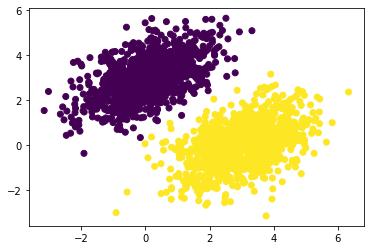

In [17]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [18]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))



**The forward pass function**

In [19]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [20]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [22]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [23]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 3.7259
Loss at step 1: 0.6184
Loss at step 2: 0.2032
Loss at step 3: 0.1405
Loss at step 4: 0.1246
Loss at step 5: 0.1154
Loss at step 6: 0.1077
Loss at step 7: 0.1007
Loss at step 8: 0.0943
Loss at step 9: 0.0885
Loss at step 10: 0.0832
Loss at step 11: 0.0783
Loss at step 12: 0.0738
Loss at step 13: 0.0697
Loss at step 14: 0.0659
Loss at step 15: 0.0625
Loss at step 16: 0.0593
Loss at step 17: 0.0565
Loss at step 18: 0.0538
Loss at step 19: 0.0514
Loss at step 20: 0.0492
Loss at step 21: 0.0471
Loss at step 22: 0.0453
Loss at step 23: 0.0436
Loss at step 24: 0.0420
Loss at step 25: 0.0406
Loss at step 26: 0.0393
Loss at step 27: 0.0381
Loss at step 28: 0.0370
Loss at step 29: 0.0359
Loss at step 30: 0.0350
Loss at step 31: 0.0342
Loss at step 32: 0.0334
Loss at step 33: 0.0327
Loss at step 34: 0.0320
Loss at step 35: 0.0314
Loss at step 36: 0.0309
Loss at step 37: 0.0304
Loss at step 38: 0.0299
Loss at step 39: 0.0295


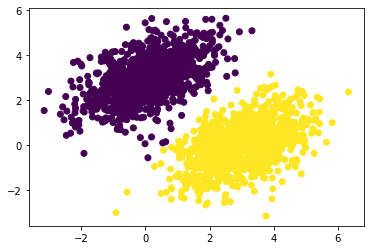

In [24]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

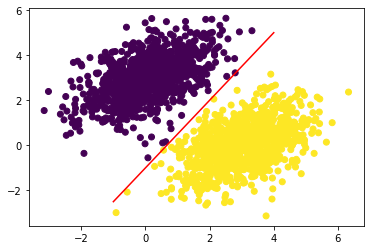

In [25]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

# Layers: The building blocks of deep learning

**The base Layer class in Keras**

**A Dense layer implemented as a Layer subclass**

In [26]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [27]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


**Automatic shape inference: Building layers on the fly**

In [28]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [29]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [30]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

# **From layers to models**

# The "compile" step: Configuring the learning **process**

In [31]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [32]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

# **Picking a loss function**

# **Understanding the fit() method**

**Calling fit() with NumPy data**

In [33]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 1s 2ms/step - loss: 11.1710 - binary_accuracy: 0.1490
Epoch 2/5
16/16 [==============================] - 0s 2ms/step - loss: 10.8005 - binary_accuracy: 0.1530
Epoch 3/5
16/16 [==============================] - 0s 2ms/step - loss: 10.4852 - binary_accuracy: 0.1545
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 10.1807 - binary_accuracy: 0.1575
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 9.8835 - binary_accuracy: 0.1615


In [34]:
history.history

{'loss': [11.170995712280273,
  10.800537109375,
  10.48518180847168,
  10.180685997009277,
  9.883536338806152],
 'binary_accuracy': [0.14900000393390656,
  0.15299999713897705,
  0.15449999272823334,
  0.1574999988079071,
  0.1615000069141388]}

# **Monitoring loss and metrics on validation data**

**Using the validation_data argument**

In [35]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 4ms/step - loss: 0.2191 - binary_accuracy: 0.9000 - val_loss: 0.0882 - val_binary_accuracy: 0.9767
Epoch 2/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0700 - binary_accuracy: 0.9650 - val_loss: 0.0312 - val_binary_accuracy: 0.9967
Epoch 3/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0740 - binary_accuracy: 0.9564 - val_loss: 0.2056 - val_binary_accuracy: 0.7533
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0773 - binary_accuracy: 0.9521 - val_loss: 0.0665 - val_binary_accuracy: 0.9633
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0674 - binary_accuracy: 0.9629 - val_loss: 0.1047 - val_binary_accuracy: 0.8800


# **Inference: Using a model after training**

In [36]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

[[-0.27846602]
 [ 0.46711746]
 [-0.09704545]
 [ 0.7813443 ]
 [ 0.24148893]
 [-0.34443375]
 [ 0.7380065 ]
 [-0.13705596]
 [ 0.01840425]
 [-0.12981859]]
